In [127]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split,GridSearchCV,RandomizedSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score,f1_score,recall_score,precision_score,roc_curve,roc_auc_score,auc
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import AdaBoostClassifier
from xgboost import XGBClassifier
import os
sns.set()
pd.set_option('display.max_columns', None)


In [128]:
X_train_credit_model = pd.read_csv("./Training/X_train.csv")
y_train_credit_model = pd.read_csv("./Training/y_train.csv")

X_train_credit_model.head()


Unique_ID  C1  C2  C3  C4  C5     C6  C7    C8     N1     N2   N3  \
0   Candidate_5926   1   0  11  31   0  False   0  True  23.75    NaN  2.5   
1  Candidate_48134   1   4   2  66   2  False   1  True  11.05   22.0  3.7   
2  Candidate_51717   1   0  19   2   0  False   0  True  29.00    NaN  2.4   
3  Candidate_26401   1   1  16  47   1  False   4  True  17.99    1.0  3.5   
4  Candidate_34872   1   1  13   1   1   True   6  True  27.50  206.0  3.8   

     N4    N5     N6    N7  N8    N9  N10  N10.1   N11  N12   N14  N15  N16  \
0   NaN   NaN  2.595  10.0   0     0  2.0   14.0   NaN  NaN   NaN  0.0  NaN   
1  16.0  12.0  3.795  19.0   4    72  0.0    5.0   9.0  0.0   0.0  0.0  0.0   
2   NaN   NaN  2.495  17.0   2    15  7.0    3.0  19.0  NaN  10.0  1.0  NaN   
3   4.0   4.0  3.595   6.0   5   190  0.0    0.0   0.0  0.0   0.0  0.0  0.0   
4  11.0  11.0  3.895  31.0  10  1504  0.0    1.0   4.0  0.0   0.0  0.0  0.0   

       N17   N18      N19   N20   N21  N22     N23           N24  N25  N26  \
0      NaN   NaN      NaN   NaN   NaN  NaN  27.816   1750.000000  NaN  NaN   
1   1944.0  0.06  25856.0  17.0  0.88  1.0  40.000  10833.333330  NaN  NaN   
2      NaN   NaN      NaN   NaN   NaN  NaN  20.000   6250.000000  NaN  NaN   
3   8244.0  0.89   1006.0   6.0  1.00  0.0  26.000   2413.666667  NaN  NaN   
4  57532.0  0.97   3398.0  31.0  0.96  0.0  44.000   7666.666667  NaN  NaN   

   N27  N28  N29  N30  N31  N32    N33     N34   N35  
0  NaN  NaN  NaN  NaN  NaN  NaN   58.0  113.39  12.0  
1  NaN  NaN  NaN  NaN  NaN  NaN  160.0  262.10  17.0  
2  NaN  NaN  NaN  NaN  NaN  NaN   24.0   50.29  18.0  
3  NaN  NaN  NaN  NaN  NaN  NaN   70.0  126.52  27.0  
4  NaN  NaN  NaN  NaN  NaN  NaN  100.0  205.47  21.0

In [129]:
y_train_credit_model.head()


Unique_ID  Dependent_Variable
0   Candidate_5926                   1
1  Candidate_48134                   0
2  Candidate_51717                   1
3  Candidate_26401                   0
4  Candidate_34872                   0

In [130]:
X_train_credit_model.shape

(33050, 44)

In [131]:
y_train_credit_model.shape

(33050, 2)

In [132]:
X_train_credit_model.dtypes

Unique_ID     object
C1             int64
C2             int64
C3             int64
C4             int64
C5             int64
C6              bool
C7             int64
C8              bool
N1           float64
N2           float64
N3           float64
N4           float64
N5           float64
N6           float64
N7           float64
N8             int64
N9             int64
N10          float64
N10.1        float64
N11          float64
N12          float64
N14          float64
N15          float64
N16          float64
N17          float64
N18          float64
N19          float64
N20          float64
N21          float64
N22          float64
N23          float64
N24          float64
N25          float64
N26          float64
N27          float64
N28          float64
N29          float64
N30          float64
N31          float64
N32          float64
N33          float64
N34          float64
N35          float64
dtype: object

In [133]:
X_train_credit_model['C6'] = X_train_credit_model['C6'].astype('int64')
X_train_credit_model['C8'] = X_train_credit_model['C8'].astype('int64')
X_train_credit_model.columns

Index(['Unique_ID', 'C1', 'C2', 'C3', 'C4', 'C5', 'C6', 'C7', 'C8', 'N1', 'N2',
       'N3', 'N4', 'N5', 'N6', 'N7', 'N8', 'N9', 'N10', 'N10.1', 'N11', 'N12',
       'N14', 'N15', 'N16', 'N17', 'N18', 'N19', 'N20', 'N21', 'N22', 'N23',
       'N24', 'N25', 'N26', 'N27', 'N28', 'N29', 'N30', 'N31', 'N32', 'N33',
       'N34', 'N35'],
      dtype='object')

Check count of NaN values in the dataset

In [134]:
X_train_credit_model[X_train_credit_model.isnull().any(axis=1)].shape

(27417, 44)

In [135]:
X_train_credit_model.isna().sum()/X_train_credit_model.shape[0]

Unique_ID    0.000000
C1           0.000000
C2           0.000000
C3           0.000000
C4           0.000000
C5           0.000000
C6           0.000000
C7           0.000000
C8           0.000000
N1           0.000000
N2           0.139546
N3           0.011044
N4           0.139365
N5           0.139365
N6           0.011044
N7           0.012920
N8           0.000000
N9           0.000000
N10          0.012920
N10.1        0.012920
N11          0.021664
N12          0.139607
N14          0.018396
N15          0.012920
N16          0.139365
N17          0.139365
N18          0.139365
N19          0.138306
N20          0.138306
N21          0.138306
N22          0.138306
N23          0.075219
N24          0.000000
N25          0.810257
N26          0.810257
N27          0.810257
N28          0.810257
N29          0.810257
N30          0.810257
N31          0.810257
N32          0.811800
N33          0.000000
N34          0.000000
N35          0.012920
dtype: float64

Check count of NaN values in the dataset Categorical Features

In [136]:
X_train_credit_model[X_train_credit_model[['C1', 'C2', 'C3', 'C4', 'C5', 'C6', 'C7', 'C8']].isnull().any(axis=1)].shape

(0, 44)

Check count of NaN values in the dataset Numerical Features

In [137]:
X_train_credit_model[X_train_credit_model[['N1', 'N2',
       'N3', 'N4', 'N5', 'N6', 'N7', 'N8', 'N9', 'N10', 'N10.1', 'N11', 'N12',
       'N14', 'N15', 'N16', 'N17', 'N18', 'N19', 'N20', 'N21', 'N22', 'N23',
       'N24', 'N25', 'N26', 'N27', 'N28', 'N29', 'N30', 'N31', 'N32', 'N33',
       'N34', 'N35']].isnull().any(axis=1)].shape

(27417, 44)

More than 80% of the data contain missing values. A proposal of performing set of experiments for applying different techniques to impute or keep the missing values were thought. Following are some of the methods-
- Using Multiple Imputation Technique to impute the data (Imputation)
    - Reason- much more accurate than KNN imputation and Regression based imputation, cutting-edge machine learning technique
    
- Using the Missing Values to build the model and adding an additional boolean feature (contains_missing_value) to the feature set (No Imputation)
    - Reason- Sometimes the missing values also can be used for extracting information from data, no imputation only adding an additional boolean feature (contains_missing_value) to the feature set which tells us if a row has missing value 


Statistical description of the numerical values before imputation

In [138]:
X_train_credit_model[['N1', 'N2',
       'N3', 'N4', 'N5', 'N6', 'N7', 'N8', 'N9', 'N10', 'N10.1', 'N11', 'N12',
       'N14', 'N15', 'N16', 'N17', 'N18', 'N19', 'N20', 'N21', 'N22', 'N23',
       'N24', 'N25', 'N26', 'N27', 'N28', 'N29', 'N30', 'N31', 'N32', 'N33',
       'N34', 'N35']].describe()

N1            N2            N3            N4            N5  \
count  33050.00000  28438.000000  32685.000000  28444.000000  28444.000000   
mean      19.97653     81.342710      3.359361      9.574075      8.350127   
std        8.11087     85.397795      0.411040      5.584756      4.999040   
min        0.00000      0.000000      0.000000      0.000000      0.000000   
25%       13.45000     21.000000      3.200000      6.000000      5.000000   
50%       19.27500     53.000000      3.400000      9.000000      8.000000   
75%       26.90000    112.000000      3.600000     13.000000     11.000000   
max       48.00000    755.000000      4.400000     59.000000     51.000000   

                 N6            N7            N8            N9           N10  \
count  32685.000000  32623.000000  33050.000000  33050.000000  32623.000000   
mean       3.454361     25.229930      6.082723    325.585870      0.903381   
std        0.411040     14.274854      4.535870    452.149358      2.635207   
min        0.095000      2.000000      0.000000      0.000000      0.000000   
25%        3.295000     15.000000      3.000000     60.000000      0.000000   
50%        3.495000     23.000000      5.000000    183.000000      0.000000   
75%        3.695000     33.000000      8.000000    420.000000      1.000000   
max        4.495000    129.000000     51.000000  14985.000000     83.000000   

              N10.1           N11            N12           N14           N15  \
count  32623.000000  32334.000000   28436.000000  32442.000000  32623.000000   
mean       2.044049      7.108678    1016.018568      4.537760      0.330135   
std        3.172081      8.304500    6739.984010     10.610457      0.799125   
min        0.000000      0.000000       0.000000      0.000000      0.000000   
25%        0.000000      2.000000       0.000000      0.000000      0.000000   
50%        1.000000      5.000000       0.000000      0.000000      0.000000   
75%        3.000000      9.000000       0.000000      4.000000      0.000000   
max      105.000000    379.000000  444745.000000     99.000000     30.000000   

                N16           N17           N18            N19           N20  \
count  28444.000000  2.844400e+04  28444.000000   28479.000000  28479.000000   
mean       0.023203  1.582073e+04      0.528907   11037.365322     21.764142   
std        0.175363  3.405137e+04      0.350046   22052.222523     12.438568   
min        0.000000  0.000000e+00      0.000000       0.000000      0.000000   
25%        0.000000  1.647000e+03      0.210000     523.000000     13.000000   
50%        0.000000  6.073000e+03      0.560000    3352.000000     20.000000   
75%        0.000000  1.627725e+04      0.840000   12285.000000     29.000000   
max        7.000000  1.435667e+06      5.830000  646285.000000    114.000000   

                N21           N22           N23            N24          N25  \
count  28479.000000  28479.000000  30564.000000   33050.000000  6271.000000   
mean       0.857199      0.906422     58.433363    5050.306727     1.338224   
std        0.173017      1.227818    150.660621    6237.726330     0.680982   
min        0.000000      0.000000      0.000000       0.000000     1.000000   
25%        0.770000      0.000000     26.000000    2833.333333     1.000000   
50%        0.920000      1.000000     40.000000    4166.666667     1.000000   
75%        1.000000      1.000000     60.000000    6250.000000     1.500000   
max        1.000000     20.000000   2002.000000  618547.833300     7.000000   

               N26          N27          N28          N29           N30  \
count  6271.000000  6271.000000  6271.000000  6271.000000   6271.000000   
mean     20.084197    19.512199     0.526391     0.045288   7192.813526   
std      16.045120    15.637882     2.144069     0.443838   6460.139952   
min       0.000000     0.000000     0.000000     0.000000   1000.000000   
25%       9.000000     9.000000     0.000000     0.000000   3000.000000 

Columns with NaN Values

In [139]:
nan_value_columns = ['N2','N3','N4','N5','N6','N7','N10','N10.1','N11','N12','N14','N15','N16','N17','N18','N19','N20','N21','N22','N23','N25','N26','N27','N28',
                     'N29','N30','N31','N32','N35']

Checking correlation between the values


Correlation matrix between Categorical values


In [140]:
categorical_corr = X_train_credit_model[['C1', 'C2', 'C3', 'C4', 'C5', 'C6', 'C7', 'C8']].corr().abs()
categorical_corr

C1        C2        C3        C4        C5        C6        C7  \
C1  1.000000  0.167943  0.046030  0.004865  0.083273  0.019266  0.039524   
C2  0.167943  1.000000  0.099444  0.022996  0.081646  0.007962  0.177221   
C3  0.046030  0.099444  1.000000  0.033770  0.081265  0.101946  0.142035   
C4  0.004865  0.022996  0.033770  1.000000  0.119557  0.013266  0.066296   
C5  0.083273  0.081646  0.081265  0.119557  1.000000  0.003574  0.427635   
C6  0.019266  0.007962  0.101946  0.013266  0.003574  1.000000  0.077698   
C7  0.039524  0.177221  0.142035  0.066296  0.427635  0.077698  1.000000   
C8  0.026589  0.096409  0.022252  0.035868  0.284552  0.056932  0.101633   

          C8  
C1  0.026589  
C2  0.096409  
C3  0.022252  
C4  0.035868  
C5  0.284552  
C6  0.056932  
C7  0.101633  
C8  1.000000

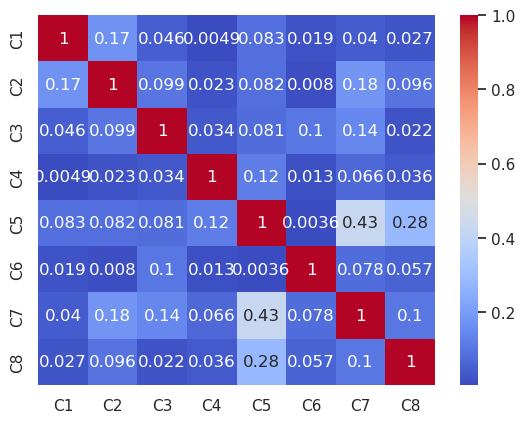

In [141]:
sns.heatmap(categorical_corr, cmap='coolwarm', annot=True)
plt.show()

Getting upper triangle of categorical correlation matrix, finding features with correlation greater than 0.85 and dropping those highly correlated categorical features


In [142]:

upper = categorical_corr.where(np.triu(np.ones(categorical_corr.shape), k=1).astype(bool))

to_drop_categorical = [column for column in upper.columns if any(upper[column] > 0.85)]
X_train_credit_model.drop(to_drop_categorical, axis=1, inplace=True)
X_train_credit_model.columns


Index(['Unique_ID', 'C1', 'C2', 'C3', 'C4', 'C5', 'C6', 'C7', 'C8', 'N1', 'N2',
       'N3', 'N4', 'N5', 'N6', 'N7', 'N8', 'N9', 'N10', 'N10.1', 'N11', 'N12',
       'N14', 'N15', 'N16', 'N17', 'N18', 'N19', 'N20', 'N21', 'N22', 'N23',
       'N24', 'N25', 'N26', 'N27', 'N28', 'N29', 'N30', 'N31', 'N32', 'N33',
       'N34', 'N35'],
      dtype='object')

Correlation matrix between Numerical values


In [143]:
numerical_corr = X_train_credit_model[['N1', 'N2',
       'N3', 'N4', 'N5', 'N6', 'N7', 'N8', 'N9', 'N10', 'N10.1', 'N11', 'N12',
       'N14', 'N15', 'N16', 'N17', 'N18', 'N19', 'N20', 'N21', 'N22', 'N23',
       'N24', 'N25', 'N26', 'N27', 'N28', 'N29', 'N30', 'N31', 'N32', 'N33',
       'N34', 'N35']].corr().abs()
numerical_corr

N1        N2        N3        N4        N5        N6        N7  \
N1     1.000000  0.037557  0.444854  0.069814  0.066882  0.444854  0.037626   
N2     0.037557  1.000000  0.084070  0.146689  0.142261  0.084070  0.220545   
N3     0.444854  0.084070  1.000000  0.137768  0.146124  1.000000  0.116590   
N4     0.069814  0.146689  0.137768  1.000000  0.955797  0.137768  0.640802   
N5     0.066882  0.142261  0.146124  0.955797  1.000000  0.146124  0.595497   
N6     0.444854  0.084070  1.000000  0.137768  0.146124  1.000000  0.116590   
N7     0.037626  0.220545  0.116590  0.640802  0.595497  0.116590  1.000000   
N8     0.104124  0.140282  0.239915  0.858870  0.895876  0.239915  0.517798   
N9     0.016531  0.168796  0.135333  0.537574  0.560968  0.135333  0.373864   
N10    0.180468  0.000892  0.396857  0.171379  0.164261  0.396857  0.104772   
N10.1  0.155611  0.015272  0.268292  0.116230  0.089133  0.268292  0.102063   
N11    0.140329  0.000432  0.270731  0.202222  0.176922  0.270731  0.205025   
N12    0.078378  0.015925  0.087357  0.080556  0.078362  0.087357  0.066270   
N14    0.177183  0.028666  0.267952  0.175891  0.183134  0.267952  0.145160   
N15    0.130601  0.049232  0.208407  0.151625  0.144706  0.208407  0.033622   
N16    0.059872  0.000058  0.113253  0.077107  0.081978  0.113253  0.026705   
N17    0.044888  0.120135  0.092096  0.355021  0.368311  0.092096  0.266451   
N18    0.286275  0.075165  0.428149  0.175294  0.179189  0.428149  0.158712   
N19    0.337962  0.039152  0.455047  0.293559  0.310486  0.455047  0.167579   
N20    0.003123  0.262902  0.148302  0.698463  0.650810  0.148302  0.939347   
N21    0.232145  0.034861  0.504912  0.323053  0.335501  0.504912  0.041203   
N22    0.086162  0.020807  0.106292  0.294582  0.257204  0.106292  0.184330   
N23    0.041258  0.022309  0.008995  0.079290  0.081463  0.008995  0.026661   
N24    0.077371  0.098484  0.133742  0.159774  0.160888  0.133742  0.182292   
N25    0.008840  0.072864  0.035643  0.054950  0.044895  0.035643  0.133028   
N26    0.115849  0.062879  0.028543  0.032732  0.033784  0.028543  0.067498   
N27    0.102306  0.063673  0.015412  0.038045  0.041845  0.015412  0.063580   
N28    0.106446  0.006188  0.087325  0.026785  0.043871  0.087325  0.040874   
N29    0.069287  0.000412  0.066302  0.028098  0.041261  0.066302  0.002142   
N30    0.140469  0.112045  0.224429  0.129626  0.136038  0.224429  0.123381   
N31    0.065596  0.063745  0.051041  0.122654  0.145016  0.051041  0.053953   
N32    0.175813  0.029250  0.283324  0.053417  0.069399  0.283324  0.064114   
N33    0.197556  0.051926  0.339497  0.166759  0.174244  0.339497  0.110742   
N34    0.112508  0.047421  0.294151  0.156389  0.164050  0.294151  0.107295   
N35    0.051030  0.316793  0.141400  0.207254  0.192097  0.141400  0.383463   

             N8        N9       N10     N10.1       N11       N12       N14  \
N1     0.104124  0.016531  0.180468  0.155611  0.140329  0.078378  0.177183   
N2     0.140282  0.168796  0.000892  0.015272  0.000432  0.015925  0.028666   
N3     0.239915  0.135333  0.396857  0.268292  0.270731  0.087357  0.267952   
N4     0.858870  0.537574  0.171379  0.116230  0.202222  0.080556  0.175891   
N5     0.895876  0.560968  0.164261  0.089133  0.176922  0.078362  0.183134   
N6     0.239915  0.135333  0.396857  0.268292  0.270731  0.087357  0.267952   
N7     0.517798  0.373864  0.104772  0.102063  0.205025  0.066270  0.145160   
N8     1.000000  0.579700  0.212544  0.017015  0.079371  0.072014  0.191947   
N9     0.579700  1.000000  0.157656  0.000881  0.038920  0.052463  0.178566   
N10    0.212544  0.157656  1.000000  0.143459  0.172258  0.373146  0.445769   
N10.1  0.017015  0.000881  0.143459  1.000000  0.761161  0.033831  0.094842   
N11    0.079371  0.038920  0.172258  0.761161  1.000000  0.045860  0.116483   
N12    0.072014  0.052463  0.373146  0.033831  0.045860  1.000000  0.262687   
N14    0.191947  0.178566  0.445769  0.094842  0.116483  0.262

In [144]:
fig = plt.figure(figsize=(30,30), dpi = 320)
sns.heatmap(numerical_corr, cmap='coolwarm', annot=True)
plt.show()

Getting upper triangle of categorical correlation matrix, finding features with correlation greater than 0.85 and dropping those highly correlated numerical features


In [145]:
upper = numerical_corr.where(np.triu(np.ones(numerical_corr.shape), k=1).astype(bool))

to_drop_numerical = [column for column in upper.columns if any(upper[column] > 0.85)]
# to be involved in data-preprocessing
X_train_credit_model.drop(to_drop_numerical, axis=1, inplace=True)
X_train_credit_model.columns

Index(['Unique_ID', 'C1', 'C2', 'C3', 'C4', 'C5', 'C6', 'C7', 'C8', 'N1', 'N2',
       'N3', 'N4', 'N7', 'N9', 'N10', 'N10.1', 'N11', 'N12', 'N14', 'N15',
       'N16', 'N17', 'N18', 'N19', 'N21', 'N22', 'N23', 'N24', 'N25', 'N26',
       'N28', 'N29', 'N30', 'N31', 'N32', 'N33', 'N35'],
      dtype='object')

In [146]:
X_train = X_train_credit_model.drop(["Unique_ID"],axis = 1)
y_train = y_train_credit_model["Dependent_Variable"]


Using Weight of Evidence for Categorical features

In [147]:
from feature_engine.encoding import WoEEncoder


In [148]:
# to be involved in data-preprocessing
X_train_credit_model[['C1', 'C3', 'C5', 'C6', 'C7', 'C8']] = X_train_credit_model[['C1', 'C3', 'C5', 'C6', 'C7', 'C8']].astype("object")
X_train_credit_model.dtypes


Unique_ID     object
C1            object
C2             int64
C3            object
C4             int64
C5            object
C6            object
C7            object
C8            object
N1           float64
N2           float64
N3           float64
N4           float64
N7           float64
N9             int64
N10          float64
N10.1        float64
N11          float64
N12          float64
N14          float64
N15          float64
N16          float64
N17          float64
N18          float64
N19          float64
N21          float64
N22          float64
N23          float64
N24          float64
N25          float64
N26          float64
N28          float64
N29          float64
N30          float64
N31          float64
N32          float64
N33          float64
N35          float64
dtype: object

In [149]:
# to be involved in data-preprocessing
woe_enc = WoEEncoder(variables=['C1', 'C3', 'C5', 'C6', 'C7', 'C8'])
woe_enc.fit(X_train_credit_model, y_train)
woe_enc.variables_

['C1', 'C3', 'C5', 'C6', 'C7', 'C8']

In [200]:
woe_enc.n_features_in_

38

In [201]:
len(X_train_credit_model.columns)

38

In [151]:
# to be involved in data-preprocessing
X_train_credit_model_enc = woe_enc.transform(X_train_credit_model)
# X_test_enc = woe_enc.transform(X_test)
X_train_credit_model_enc.head()

Unique_ID        C1  C2        C3  C4        C5        C6        C7  \
0   Candidate_5926  0.024745   0  0.236435  31  0.426786  0.063968  0.420808   
1  Candidate_48134  0.024745   4  0.045898  66 -0.028554  0.063968 -0.499104   
2  Candidate_51717  0.024745   0  0.142801   2  0.426786  0.063968  0.420808   
3  Candidate_26401  0.024745   1 -0.198871  47 -0.281577  0.063968  0.123008   
4  Candidate_34872  0.024745   1 -0.295967   1 -0.281577 -0.074689 -0.358377   

         C8     N1     N2   N3    N4    N7    N9  N10  N10.1   N11  N12   N14  \
0 -0.017946  23.75    NaN  2.5   NaN  10.0     0  2.0   14.0   NaN  NaN   NaN   
1 -0.017946  11.05   22.0  3.7  16.0  19.0    72  0.0    5.0   9.0  0.0   0.0   
2 -0.017946  29.00    NaN  2.4   NaN  17.0    15  7.0    3.0  19.0  NaN  10.0   
3 -0.017946  17.99    1.0  3.5   4.0   6.0   190  0.0    0.0   0.0  0.0   0.0   
4 -0.017946  27.50  206.0  3.8  11.0  31.0  1504  0.0    1.0   4.0  0.0   0.0   

   N15  N16      N17   N18      N19   N21  N22     N23           N24  N25  \
0  0.0  NaN      NaN   NaN      NaN   NaN  NaN  27.816   1750.000000  NaN   
1  0.0  0.0   1944.0  0.06  25856.0  0.88  1.0  40.000  10833.333330  NaN   
2  1.0  NaN      NaN   NaN      NaN   NaN  NaN  20.000   6250.000000  NaN   
3  0.0  0.0   8244.0  0.89   1006.0  1.00  0.0  26.000   2413.666667  NaN   
4  0.0  0.0  57532.0  0.97   3398.0  0.96  0.0  44.000   7666.666667  NaN   

   N26  N28  N29  N30  N31  N32    N33   N35  
0  NaN  NaN  NaN  NaN  NaN  NaN   58.0  12.0  
1  NaN  NaN  NaN  NaN  NaN  NaN  160.0  17.0  
2  NaN  NaN  NaN  NaN  NaN  NaN   24.0  18.0  
3  NaN  NaN  NaN  NaN  NaN  NaN   70.0  27.0  
4  NaN  NaN  NaN  NaN  NaN  NaN  100.0  21.0

In [152]:
X_y_merge_credit_model = pd.merge(X_train_credit_model_enc, y_train_credit_model, on = 'Unique_ID')
X_y_merge_credit_model.dtypes


Unique_ID              object
C1                    float64
C2                      int64
C3                    float64
C4                      int64
C5                    float64
C6                    float64
C7                    float64
C8                    float64
N1                    float64
N2                    float64
N3                    float64
N4                    float64
N7                    float64
N9                      int64
N10                   float64
N10.1                 float64
N11                   float64
N12                   float64
N14                   float64
N15                   float64
N16                   float64
N17                   float64
N18                   float64
N19                   float64
N21                   float64
N22                   float64
N23                   float64
N24                   float64
N25                   float64
N26                   float64
N28                   float64
N29                   float64
N30       

### Using the Missing Values to build the model and adding an additional boolean feature (contains_missing_value) to the feature set (No Imputation)
- Decision Tree Classifier
- XGBoost Classifier
As the above are unaffected with NaN values

In [156]:
class ModelTrainig():
    def __init__(self,df,model_name):
        
        
        
        x = df.drop(["Unique_ID","Dependent_Variable"],axis = 1)
        y = df["Dependent_Variable"]

        x_train,x_test, y_train,y_test = train_test_split(x,y,test_size=0.2, random_state=10,stratify = y)
        self.x_train = x_train
        self.x_test = x_test
        self.y_train = y_train
        self.y_test = y_test
        self.model_name = model_name

    def build_model(self):
        model_name = self.model_name
        model_names = ['LogisticRegression','DecisionTree','RandomForest',"AdaBoost",'XGBoost']

        
        if model_name == 'LogisticRegression': model,metrics = self.logistic_regression()
        if model_name == 'DecisionTree': model,metrics = self.decision_tree()
        if model_name == 'RandomForest': model,metrics = self.random_forest()
        if model_name == 'AdaBoost': model,metrics = self.adaboost()
        if model_name == 'XGBoost': model,metrics = self.xgboost_model()
        return model,metrics

    def roc_auc_score_calc(self,y_prob_pred_cnb):
        # fpr = {}
        # tpr = {}
        # thresh ={}

        

        #roc auc score
        roc_auc_sc = roc_auc_score(self.y_test, y_prob_pred_cnb, multi_class='ovo', average='weighted')

        # n_class = 2
        # for i in range(n_class):    
        #     fpr[i], tpr[i], thresh[i] = roc_curve(self.y_test, y_prob_pred_cnb[:,i], pos_label=i)
        # return  roc_auc_sc
        return roc_auc_sc

    def logistic_regression(self):
        model = LogisticRegression(multi_class = 'ovr')
        model.fit(self.x_train,self.y_train)

        THRESHOLD = 0.5
        preds = np.where(model.predict_proba(self.x_test)[:,1] > THRESHOLD, 1, 0)

        y_pred_cnb = model.predict(self.x_test)
        y_prob_pred_cnb = model.predict_proba(self.x_test)
        # print(y_prob_pred_cnb)
        #  roc_auc_sc = self.roc_auc_score_calc(y_prob_pred_cnb)
        
        roc_auc_sc = self.roc_auc_score_calc(y_pred_cnb)
        
        metrics_df = pd.DataFrame(data=[accuracy_score(self.y_test, preds),
                        recall_score(self.y_test, preds,average='micro'),
                        precision_score(self.y_test, preds,average='micro'),
                         roc_auc_sc], 
                        index=["accuracy", "recall", "precision", "roc_auc_score"])
        

        return model,metrics_df


    def decision_tree(self):
        dt_model = DecisionTreeClassifier()
        # Create the parameter grid based on the results of random search 
        params = {
            'max_depth': np.arange(2,15),
            'min_samples_leaf': np.arange(4,15),
            'criterion': ["gini", "entropy"]
        }
        # Instantiate the grid search model
        best_model = GridSearchCV(estimator = dt_model, param_grid=params, 
                    cv=3, n_jobs=-1, verbose=1, scoring = "accuracy")
        best_model.fit(self.x_train, self.y_train)
        # score_df = pd.DataFrame(best_model.cv_results_)
        model = best_model.best_estimator_
        model.fit(self.x_train,self.y_train)
        THRESHOLD = 0.5
        preds = np.where(model.predict_proba(self.x_test)[:,1] > THRESHOLD, 1, 0)

        y_pred_cnb = model.predict(self.x_test)
        y_prob_pred_cnb = model.predict_proba(self.x_test)
        # print(y_prob_pred_cnb)
        #  roc_auc_sc = self.roc_auc_score_calc(y_prob_pred_cnb)
        
        roc_auc_sc = self.roc_auc_score_calc(y_pred_cnb)

        metrics_df = pd.DataFrame(data=[accuracy_score(self.y_test, preds),
                        recall_score(self.y_test, preds,average='micro'),
                        precision_score(self.y_test, preds,average='micro'),
                         roc_auc_sc], 
                        index=["accuracy", "recall", "precision", "roc_auc_score"])
        return model,metrics_df

    def random_forest(self):

        rf_model = RandomForestClassifier()
        rf_model.fit(self.x_train,self.y_train)

        # Number of trees in random forest
        n_estimators = np.arange(50,53)  # 10, 200
        max_features = ['auto', 'sqrt']
        max_depth = np.arange(3, 15) # 3,20
        min_samples_split = np.arange(2,15) # (2,30)
        min_samples_leaf = np.arange(2,15)  # 2,30
        bootstrap = [True, False]
        # Create the random grid
        random_grid = {'n_estimators': n_estimators,
                    'max_features': max_features,
                    'max_depth': max_depth,
                    'min_samples_split': min_samples_split,
                    'min_samples_leaf': min_samples_leaf,
                    'bootstrap': bootstrap}

        
        best_model = RandomizedSearchCV(estimator = rf_model, param_distributions = random_grid, n_iter = 100, cv = 5, random_state=42)
        # Fit the random search model
        best_model.fit(self.x_train, self.y_train)

        model = best_model.best_estimator_
        model.fit(self.x_train,self.y_train)
        THRESHOLD = 0.5
        preds = np.where(model.predict_proba(self.x_test)[:,1] > THRESHOLD, 1, 0)

        y_pred_cnb = model.predict(self.x_test)
        y_prob_pred_cnb = model.predict_proba(self.x_test)
        # print(y_prob_pred_cnb)
        #  roc_auc_sc = self.roc_auc_score_calc(y_prob_pred_cnb)
        
        roc_auc_sc = self.roc_auc_score_calc(y_pred_cnb)

        metrics_df = pd.DataFrame(data=[accuracy_score(self.y_test, preds),
                        recall_score(self.y_test, preds,average='micro'),
                        precision_score(self.y_test, preds,average='micro'),
                         roc_auc_sc], 
                        index=["accuracy", "recall", "precision", "roc_auc_score"])
        return model,metrics_df

    def adaboost(self):

        adb_model = AdaBoostClassifier()

        grid = {'n_estimators':[10, 50, 100, 500],
                'learning_rate':[0.0001, 0.001, 0.01, 0.1, 1.0]}

        # define the grid search procedure
        best_model = GridSearchCV(estimator=adb_model, param_grid=grid, n_jobs=-1, cv=5, scoring='accuracy')
        # execute the grid search
        best_model.fit(self.x_train,self.y_train)
        # summarize the best score and configuration
        print("Best: %f using %s" % (best_model.best_score_, best_model.best_params_))
        # summarize all scores that were evaluated
        model = best_model.best_estimator_
        model.fit(self.x_train,self.y_train)
        THRESHOLD = 0.5
        preds = np.where(model.predict_proba(self.x_test)[:,1] > THRESHOLD, 1, 0)

        y_pred_cnb = model.predict(self.x_test)
        y_prob_pred_cnb = model.predict_proba(self.x_test)
        # print(y_prob_pred_cnb)
        #  roc_auc_sc = self.roc_auc_score_calc(y_prob_pred_cnb)
        
        roc_auc_sc = self.roc_auc_score_calc(y_pred_cnb)

        metrics_df = pd.DataFrame(data=[accuracy_score(self.y_test, preds),
                        recall_score(self.y_test, preds,average='micro'),
                        precision_score(self.y_test, preds,average='micro'),
                         roc_auc_sc], 
                        index=["accuracy", "recall", "precision", "roc_auc_score"])
        return model,metrics_df

    def xgboost_model(self):

        model = XGBClassifier( learning_rate =0.01, n_estimators=140, max_depth=5,
        min_child_weight=1, gamma=0, subsample=0.8, colsample_bytree=0.8,
        objective= 'binary:logistic', nthread=4, scale_pos_weight=1, seed=27)
        model.fit(self.x_train,self.y_train)

        param_test1 = {
        'max_depth':range(3,10,2),
        'min_child_weight':range(1,6,2)
        }
        best_model = GridSearchCV(estimator = model, 
        param_grid = param_test1,
        scoring='roc_auc',
        n_jobs=4, cv=5)
        best_model.fit(self.x_train,self.y_train)

        model = best_model.best_estimator_
        model.fit(self.x_train,self.y_train)
        THRESHOLD = 0.5
        preds = np.where(model.predict_proba(self.x_test)[:,1] > THRESHOLD, 1, 0)

        y_pred_cnb = model.predict(self.x_test)
        y_prob_pred_cnb = model.predict_proba(self.x_test)
        # print(y_prob_pred_cnb)
        #  roc_auc_sc = self.roc_auc_score_calc(y_prob_pred_cnb)
        
        roc_auc_sc = self.roc_auc_score_calc(y_pred_cnb)

        metrics_df = pd.DataFrame(data=[accuracy_score(self.y_test, preds),
                        recall_score(self.y_test, preds,average='micro'),
                        precision_score(self.y_test, preds,average='micro'),
                         roc_auc_sc], 
                        index=["accuracy", "recall", "precision", "roc_auc_score"])
        return model,metrics_df
    
    # def lightgbm_model(self):


In [232]:
# Predict best model on X_test data
def x_test_predictions(model, X_test, save_path):
    test_UniqueID = X_test["Unique_ID"]                    # store test id in a variable

    X_test = X_test.drop(['Unique_ID'],axis = 1) 
    
    Class_1_Probability = model.predict_proba(X_test)[:, 1]


    # write the results to a csv file
    d = pd.DataFrame({'Unique_ID':test_UniqueID,
                    'Class_1_Probability':Class_1_Probability})
    d.to_csv(save_path+'submission.csv',index=None)

In [158]:
# 'DecisionTree'
decision_tree_model_training = ModelTrainig(X_y_merge_credit_model,"DecisionTree")
decision_tree_model,decision_tree_metrics = decision_tree_model_training.build_model()
decision_tree_metrics

Fitting 3 folds for each of 286 candidates, totalling 858 fits


0
accuracy       0.719818
recall         0.719818
precision      0.719818
roc_auc_score  0.592386

In [159]:
# 'XGBoost'
xgboost_model_training = ModelTrainig(X_y_merge_credit_model,"XGBoost")
xgboost_model,xgboost_metrics = xgboost_model_training.build_model()
xgboost_metrics

0
accuracy       0.734796
recall         0.734796
precision      0.734796
roc_auc_score  0.612979

### Using Multiple Imputation Technique to impute the data (Imputation)
- LogisticRegression
- RandomForest
- Decision Tree Classifier
- AdaBoost
- XGBoost Classifier


In [160]:
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer

In [161]:
imputer = IterativeImputer(random_state=300, max_iter=10)
X_y_merge_credit_model_imputed = X_y_merge_credit_model.copy(deep=False)

In [162]:
# Use Numeric Features
X_y_merge_credit_model_impute_numerical = X_y_merge_credit_model_imputed.loc[:, ['N1', 'N2','N3', 'N4', 'N7', 'N9', 'N10', 'N10.1', 'N11', 'N12','N14', 'N15', 
                                                                                 'N16', 'N17', 'N18', 'N19', 'N21', 'N22', 'N23',
                                                                                 'N24', 'N25', 'N26', 'N28', 'N29', 'N30', 'N31', 'N32', 'N33', 'N35']]
X_y_merge_credit_model_impute_numerical.head()


N1     N2   N3    N4    N7    N9  N10  N10.1   N11  N12   N14  N15  N16  \
0  23.75    NaN  2.5   NaN  10.0     0  2.0   14.0   NaN  NaN   NaN  0.0  NaN   
1  11.05   22.0  3.7  16.0  19.0    72  0.0    5.0   9.0  0.0   0.0  0.0  0.0   
2  29.00    NaN  2.4   NaN  17.0    15  7.0    3.0  19.0  NaN  10.0  1.0  NaN   
3  17.99    1.0  3.5   4.0   6.0   190  0.0    0.0   0.0  0.0   0.0  0.0  0.0   
4  27.50  206.0  3.8  11.0  31.0  1504  0.0    1.0   4.0  0.0   0.0  0.0  0.0   

       N17   N18      N19   N21  N22     N23           N24  N25  N26  N28  \
0      NaN   NaN      NaN   NaN  NaN  27.816   1750.000000  NaN  NaN  NaN   
1   1944.0  0.06  25856.0  0.88  1.0  40.000  10833.333330  NaN  NaN  NaN   
2      NaN   NaN      NaN   NaN  NaN  20.000   6250.000000  NaN  NaN  NaN   
3   8244.0  0.89   1006.0  1.00  0.0  26.000   2413.666667  NaN  NaN  NaN   
4  57532.0  0.97   3398.0  0.96  0.0  44.000   7666.666667  NaN  NaN  NaN   

   N29  N30  N31  N32    N33   N35  
0  NaN  NaN  NaN  NaN   58.0  12.0  
1  NaN  NaN  NaN  NaN  160.0  17.0  
2  NaN  NaN  NaN  NaN   24.0  18.0  
3  NaN  NaN  NaN  NaN   70.0  27.0  
4  NaN  NaN  NaN  NaN  100.0  21.0

In [220]:
imputer.fit(X_y_merge_credit_model_impute_numerical)



IterativeImputer(random_state=300)

In [164]:
df_imputed = imputer.transform(X_y_merge_credit_model_impute_numerical)


In [165]:
X_y_merge_credit_model_imputed.loc[:, ['N1', 'N2','N3', 'N4', 'N7', 'N9', 'N10', 'N10.1', 'N11', 'N12','N14', 'N15', 
                                       'N16', 'N17', 'N18', 'N19', 'N21', 'N22', 'N23',
                                     'N24', 'N25', 'N26', 'N28', 'N29', 'N30', 'N31', 'N32', 'N33', 'N35']] = df_imputed
X_y_merge_credit_model_imputed.head(10)

Unique_ID        C1  C2        C3  C4        C5        C6        C7  \
0   Candidate_5926  0.024745   0  0.236435  31  0.426786  0.063968  0.420808   
1  Candidate_48134  0.024745   4  0.045898  66 -0.028554  0.063968 -0.499104   
2  Candidate_51717  0.024745   0  0.142801   2  0.426786  0.063968  0.420808   
3  Candidate_26401  0.024745   1 -0.198871  47 -0.281577  0.063968  0.123008   
4  Candidate_34872  0.024745   1 -0.295967   1 -0.281577 -0.074689 -0.358377   
5  Candidate_29660  0.024745   0 -0.377738  13 -0.028554  0.063968 -0.196814   
6  Candidate_29517  0.024745   0  0.079776   0 -0.028554 -0.074689 -0.196814   
7  Candidate_34848  0.024745   1 -0.190005  17 -0.281577  0.063968  0.269594   
8  Candidate_12081  0.024745   0 -0.156101  31  0.426786  0.063968  0.420808   
9  Candidate_34016  0.024745   4 -0.018397   0 -0.028554 -0.074689  0.123008   

         C8     N1          N2   N3         N4    N7    N9  N10  N10.1  \
0 -0.017946  23.75   20.643281  2.5   6.659659  10.0     0  2.0   14.0   
1 -0.017946  11.05   22.000000  3.7  16.000000  19.0    72  0.0    5.0   
2 -0.017946  29.00   55.114959  2.4   4.044697  17.0    15  7.0    3.0   
3 -0.017946  17.99    1.000000  3.5   4.000000   6.0   190  0.0    0.0   
4 -0.017946  27.50  206.000000  3.8  11.000000  31.0  1504  0.0    1.0   
5 -0.017946  13.50   14.000000  3.3  11.000000  11.0   337  0.0    1.0   
6 -0.017946   8.50   27.000000  3.6  13.000000  25.0   443  0.0    3.0   
7 -0.017946  16.20    8.000000  3.5   4.000000   6.0   221  0.0    0.0   
8 -0.017946  11.75   68.455280  3.0   9.713328  33.0    65  1.0    0.0   
9 -0.017946  10.50   10.000000  3.9   5.000000  14.0    19  0.0    0.0   

         N11          N12        N14  N15       N16           N17       N18  \
0  30.433973  1514.460811   6.476692  0.0  0.036434  -2886.462743  0.697084   
1   9.000000     0.000000   0.000000  0.0  0.000000   1944.000000  0.060000   
2  19.000000  7452.528246  10.000000  1.0  0.120840  -3007.637138  0.829553   
3   0.000000     0.000000   0.000000  0.0  0.000000   8244.000000  0.890000   
4   4.000000     0.000000   0.000000  0.0  0.000000  57532.000000  0.970000   
5   4.000000     0.000000   0.000000  0.0  0.000000   6990.000000  0.620000   
6   9.000000     0.000000   0.000000  0.0  0.000000  55008.000000  0.580000   
7   1.000000     0.000000   0.000000  0.0  0.000000   2410.000000  0.600000   
8   2.000000   670.535122   5.000000  1.0  0.079549  -2403.279888  0.680362   
9   3.000000     0.000000   0.000000  0.0  0.000000    981.000000  0.100000   

            N19       N21       N22     N23           N24       N25  \
0  -8701.978303  0.670013  2.805006  27.816   1750.000000  1.017956   
1  25856.000000  0.880000  1.000000  40.000  10833.333330  1.212630   
2 -16669.724000  0.487183  0.761307  20.000   6250.000000  1.147605   
3   1006.000000  1.000000  0.000000  26.000   2413.666667  1.139766   
4   3398.000000  0.960000  0.000000  44.000   7666.666667  1.306518   
5   4110.000000  0.900000  2.000000  48.000   4250.000000  1.183641   
6  38757.000000  1.000000  2.000000  30.000   4875.000000  1.249248   
7    791.000000  1.000000  1.000000  42.000   1960.000000  1.261270   
8   1724.014623  0.739403  0.874698  32.000   3750.000000  1.372723   
9   8019.000000  1.000000  0.000000  30.000   3000.000000  1.292153   

         N26       N28       N29           N30          N31        N32    N33  \
0   3.749583  0.352105  0.095986   2133.219529  1721.750418 -32.403338   58.0   
1  16.000479  0.311448  0.026226   8977.203702  3103.349158  26.513945  160.0   
2  16.426035  0.784140  0.083618   1768.687036  1783.048163 -23.933381   24.0   
3  20.593237  0.230520  0.032222   4939.336228  1786.702096  -2.443757   70.0   
4  27.203766  0.463153  0.063104  10487.858735  3059.487059  24.211408  100.0   
5  16.124791  0.165663  0.016987   6295.470172  2505.480950  -1.765263  150.0   
6  12.978198 -0.113888 -0.017750   5785.072845  2041.872134   4.407962   51.0   
7  18.519421 

In [166]:
# 'LogisticRegression'
logistic_regression_model_training = ModelTrainig(X_y_merge_credit_model_imputed,"LogisticRegression")
logistic_regression_model,logistic_regression_metrics = logistic_regression_model_training.build_model()
logistic_regression_metrics

/home/siddhant/anaconda3/envs/monsoon-hire-a-thon/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


0
accuracy       0.700151
recall         0.700151
precision      0.700151
roc_auc_score  0.548747

In [167]:
# 'RandomForest'
random_forest_model_training = ModelTrainig(X_y_merge_credit_model_imputed,"RandomForest")
random_forest_model,random_forest_metrics = random_forest_model_training.build_model()
random_forest_metrics

/home/siddhant/anaconda3/envs/monsoon-hire-a-thon/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:425: FitFailedWarning: 
250 fits failed out of a total of 500.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
250 fits failed with the following error:
Traceback (most recent call last):
  File "/home/siddhant/anaconda3/envs/monsoon-hire-a-thon/lib/python3.10/site-packages/sklearn/model_selection/_validation.py", line 732, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/home/siddhant/anaconda3/envs/monsoon-hire-a-thon/lib/python3.10/site-packages/sklearn/base.py", line 1144, in wrapper
    estimator._validate_params()
  File "/home/siddhant/anaconda3/envs/monsoon-hire-a-thon/lib/python3.10/si

0
accuracy       0.732375
recall         0.732375
precision      0.732375
roc_auc_score  0.610144

In [168]:
# "AdaBoost"
adaboost_model_training = ModelTrainig(X_y_merge_credit_model_imputed,"AdaBoost")
adaboost_model,adaboost_metrics = adaboost_model_training.build_model()
adaboost_metrics


Best: 0.737897 using {'learning_rate': 0.1, 'n_estimators': 500}


0
accuracy       0.730257
recall         0.730257
precision      0.730257
roc_auc_score  0.613491

In [169]:
# 'XGBoost'
xgboost_model_training_imputed = ModelTrainig(X_y_merge_credit_model_imputed,"XGBoost")
xgboost_model_imputed,xgboost_metrics_imputed = xgboost_model_training_imputed.build_model()
xgboost_metrics_imputed

0
accuracy       0.737216
recall         0.737216
precision      0.737216
roc_auc_score  0.617170

In [170]:
# 'DecisionTree'
decision_tree_model_training_imputed = ModelTrainig(X_y_merge_credit_model_imputed,"DecisionTree")
decision_tree_model_imputed,decision_tree_metrics_imputed = decision_tree_model_training_imputed.build_model()
decision_tree_metrics_imputed

Fitting 3 folds for each of 286 candidates, totalling 858 fits


0
accuracy       0.713767
recall         0.713767
precision      0.713767
roc_auc_score  0.601428

In [214]:
X_test_df = pd.read_csv("./Test/X_test.csv")
X_test_df = X_test_df[X_train_credit_model.columns]

In [225]:
def final_model_pre_processing(raw_df, if_imputation=False):
    raw_df['C6'] = raw_df['C6'].astype('int64')
    raw_df['C8'] = raw_df['C8'].astype('int64')
    raw_df[['C1', 'C3', 'C5', 'C6', 'C7', 'C8']] = raw_df[['C1', 'C3', 'C5', 'C6', 'C7', 'C8']].astype("object")

    # preprocessed_df = raw_df.drop(['N6','N5','N8','N20','N27','N34'],axis = 1)
    print(raw_df.columns)
    print(woe_enc.feature_names_in_)
    preprocessed_df_enc = woe_enc.transform(raw_df)
    
    if if_imputation:
        preprocessed_df_impute_numerical = preprocessed_df_enc.loc[:, ['N1', 'N2','N3', 'N4', 'N7', 'N9', 'N10', 'N10.1', 'N11', 'N12','N14', 'N15', 
                                                                                 'N16', 'N17', 'N18', 'N19', 'N21', 'N22', 'N23',
                                                                                 'N24', 'N25', 'N26', 'N28', 'N29', 'N30', 'N31', 'N32', 'N33', 'N35']]
        # imputer.fit(preprocessed_df_impute_numerical)

        df_imputed = imputer.transform(preprocessed_df_impute_numerical)
        preprocessed_df_enc.loc[:, ['N1', 'N2','N3', 'N4', 'N7', 'N9', 'N10', 'N10.1', 'N11', 'N12','N14', 'N15', 
                                       'N16', 'N17', 'N18', 'N19', 'N21', 'N22', 'N23',
                                     'N24', 'N25', 'N26', 'N28', 'N29', 'N30', 'N31', 'N32', 'N33', 'N35']] = df_imputed
    
    


    return preprocessed_df_enc
    

In [226]:
preprocessed_X_test_imputed = final_model_pre_processing(X_test_df, if_imputation=True)
preprocessed_X_test = final_model_pre_processing(X_test_df, if_imputation=False)


Index(['Unique_ID', 'C1', 'C2', 'C3', 'C4', 'C5', 'C6', 'C7', 'C8', 'N1', 'N2',
       'N3', 'N4', 'N7', 'N9', 'N10', 'N10.1', 'N11', 'N12', 'N14', 'N15',
       'N16', 'N17', 'N18', 'N19', 'N21', 'N22', 'N23', 'N24', 'N25', 'N26',
       'N28', 'N29', 'N30', 'N31', 'N32', 'N33', 'N35'],
      dtype='object')
['Unique_ID', 'C1', 'C2', 'C3', 'C4', 'C5', 'C6', 'C7', 'C8', 'N1', 'N2', 'N3', 'N4', 'N7', 'N9', 'N10', 'N10.1', 'N11', 'N12', 'N14', 'N15', 'N16', 'N17', 'N18', 'N19', 'N21', 'N22', 'N23', 'N24', 'N25', 'N26', 'N28', 'N29', 'N30', 'N31', 'N32', 'N33', 'N35']
Index(['Unique_ID', 'C1', 'C2', 'C3', 'C4', 'C5', 'C6', 'C7', 'C8', 'N1', 'N2',
       'N3', 'N4', 'N7', 'N9', 'N10', 'N10.1', 'N11', 'N12', 'N14', 'N15',
       'N16', 'N17', 'N18', 'N19', 'N21', 'N22', 'N23', 'N24', 'N25', 'N26',
       'N28', 'N29', 'N30', 'N31', 'N32', 'N33', 'N35'],
      dtype='object')
['Unique_ID', 'C1', 'C2', 'C3', 'C4', 'C5', 'C6', 'C7', 'C8', 'N1', 'N2', 'N3', 'N4', 'N7', 'N9', 'N10', 'N10.1', 'N1

In [233]:
x_test_predictions(xgboost_model_imputed,preprocessed_X_test_imputed,"")